In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('thucung.csv')

df.head(100100)

,Unnamed: 0,product_id,product_category,price,VAP,vendor_id,country,pet_size,pet_type,rating,re_buy,quantity
0,0,5040,Equipment,7293,0,VC_1605,Vietnam,small,fish,7,1,110.7
1,1,5040,Toys,9304,1,VC_1132,India,small,cat,10,0,54.9
2,2,5040,Toys,8180,0,VC_802,India,small,hamster,6,0,196.2
3,3,5040,Snack,18559,1,VC_929,India,large,dog,1,1,62.1
4,4,5040,Supplements,10283,1,VC_749,India,large,dog,10,0,124.2
...,...,...,...,...,...,...,...,...,...,...,...,...
874,874,4999,Snack,11302,1,VC_1564,NaN,medium,bird,6,0,24.3
875,875,4243,Snack,13390,0,VC_808,India,medium,hamster,8,0,68.4
876,876,4783,Snack,17240,1,VC_1348,USA,medium,cat,7,1,145.8
877,877,4664,Bedding,15319,1,VC_1229,India,large,dog,10,1,30.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        879 non-null    int64  
 1   product_id        879 non-null    int64  
 2   product_category  879 non-null    object 
 3   price             879 non-null    int64  
 4   VAP               879 non-null    int64  
 5   vendor_id         879 non-null    object 
 6   country           836 non-null    object 
 7   pet_size          879 non-null    object 
 8   pet_type          879 non-null    object 
 9   rating            879 non-null    int64  
 10  re_buy            879 non-null    int64  
 11  quantity          879 non-null    float64
dtypes: float64(1), int64(6), object(5)
memory usage: 82.5+ KB


In [9]:
df.isnull().sum()

Unnamed: 0           0
product_id           0
product_category     0
price                0
VAP                  0
vendor_id            0
country             43
pet_size             0
pet_type             0
rating               0
re_buy               0
quantity             0
dtype: int64

In [12]:
conflicts = df[df.duplicated(subset=["product_id"], keep=False)]

In [13]:
conflict_groups = conflicts.groupby("product_id").filter(
    lambda group: not group.iloc[:, 1:].nunique().eq(1).all()
)

In [14]:
if not conflict_groups.empty:
    print("Các dòng có dữ liệu xung đột:")
    print(conflict_groups)
else:
    print("Không có xung đột trong dữ liệu.")

Các dòng có dữ liệu xung đột:
    Unnamed: 0  product_id product_category  price  VAP vendor_id  country  \
0            0        5040        Equipment   7293    0   VC_1605  Vietnam   
1            1        5040             Toys   9304    1   VC_1132    India   
2            2        5040             Toys   8180    0    VC_802    India   
3            3        5040            Snack  18559    1    VC_929    India   
4            4        5040      Supplements  10283    1    VC_749    India   
5            5        5040          Bedding   3969    1   VC_1174    India   
6            6        5040             Toys  13519    1    VC_945    India   
7            7        5040          Bedding  13078    0    VC_954    India   
8            8        5040      Supplements  13701    0   VC_1262  Belgium   
9            9        5040         Medicine  19082    1    VC_803    India   
10          10        5040            Snack  14479    1   VC_1215    India   

       pet_size pet_type  rating 

In [15]:
df = df.sort_values(by="price").drop_duplicates(subset="product_id", keep="first")


In [17]:
vendor_country_map =df.dropna(subset=["country"]).set_index("vendor_id")["country"].to_dict()
df["country"] = df.apply(
    lambda row: vendor_country_map.get(row["vendor_id"], row["country"]) if pd.isnull(row["country"]) else row["country"],
    axis=1
)

In [33]:
Q1 = df['re_buy'].quantile(0.25)
Q3 = df['re_buy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['re_buy'] < lower_bound) | (df['re_buy'] > upper_bound)]

In [36]:
  if not outliers.empty:
        print(f"Giá trị ngoại lai trong cột {"re_buy"}:")
        print(outliers['re_buy'])

Giá trị ngoại lai trong cột re_buy:
23     99
40     99
45     99
54     99
73     99
77     99
93     99
106    99
148    99
153    99
155    99
157    99
165    99
221    99
374    99
391    99
407    99
412    99
415    99
421    99
441    99
454    99
464    99
478    99
488    99
529    99
542    99
583    99
598    99
608    99
614    99
629    99
649    99
689    99
693    99
724    99
725    99
734    99
735    99
809    99
835    99
837    99
847    99
Name: re_buy, dtype: int64


In [37]:
df = df[(df['re_buy'] >= lower_bound) & (df['re_buy'] <= upper_bound)]

In [39]:
df["country"] = df["country"].fillna(method="ffill")

C:\Users\DELL\AppData\Local\Temp\ipykernel_16788\986133568.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["country"] = df["country"].fillna(method="ffill")


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 878
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        836 non-null    int64  
 1   product_id        836 non-null    int64  
 2   product_category  836 non-null    object 
 3   price             836 non-null    int64  
 4   VAP               836 non-null    int64  
 5   vendor_id         836 non-null    object 
 6   country           836 non-null    object 
 7   pet_size          836 non-null    object 
 8   pet_type          836 non-null    object 
 9   rating            836 non-null    int64  
 10  re_buy            836 non-null    int64  
 11  quantity          836 non-null    float64
 12  total             836 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 91.4+ KB


In [41]:
df['total'] = df['price'] * df['quantity']

In [42]:
df['profit'] = df['total'] - (df['price'] * df['quantity'] * 0.7)

In [43]:
df.head()

,Unnamed: 0,product_id,product_category,price,VAP,vendor_id,country,pet_size,pet_type,rating,re_buy,quantity,total,profit
0,0,5040,Equipment,7293,0,VC_1605,Vietnam,small,fish,7,1,110.7,807335.1,242200.53
1,1,5040,Toys,9304,1,VC_1132,India,small,cat,10,0,54.9,510789.6,153236.88
2,2,5040,Toys,8180,0,VC_802,India,small,hamster,6,0,196.2,1604916.0,481474.80
3,3,5040,Snack,18559,1,VC_929,India,large,dog,1,1,62.1,1152513.9,345754.17
4,4,5040,Supplements,10283,1,VC_749,India,large,dog,10,0,124.2,1277148.6,383144.58


In [44]:
pet_type_sales = df.groupby('pet_type')['quantity'].sum()

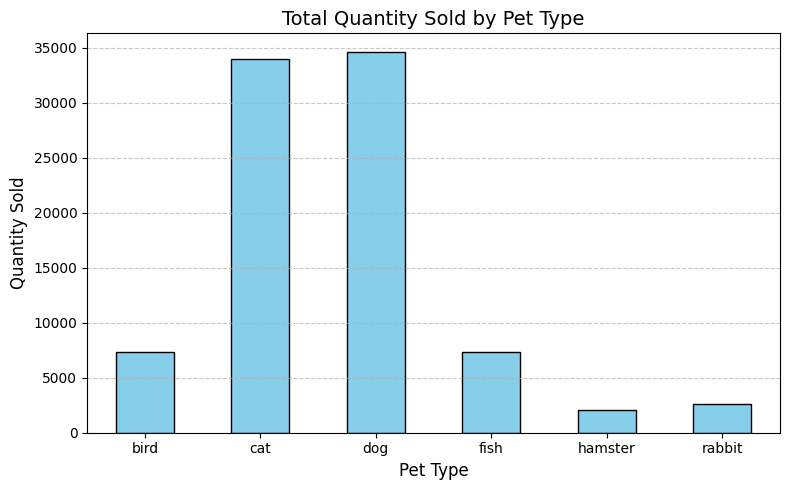

In [45]:
plt.figure(figsize=(8, 5))
pet_type_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Quantity Sold by Pet Type', fontsize=14)
plt.xlabel('Pet Type', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

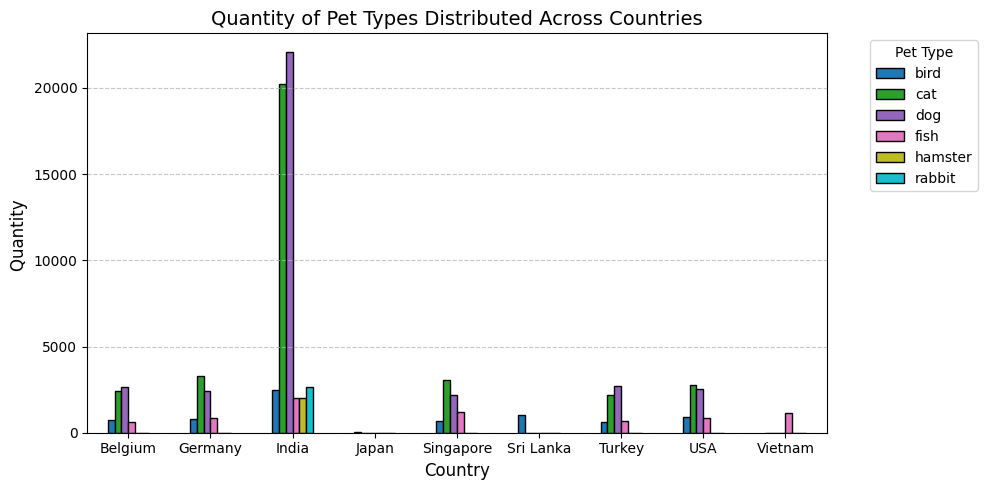

In [46]:

pet_type_country_sales = df.groupby(['country', 'pet_type'])['quantity'].sum()

pet_type_country_sales.unstack(level=1).plot(kind='bar', figsize=(10, 5), colormap='tab10', edgecolor='black')
plt.title('Quantity of Pet Types Distributed Across Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Quantity ', fontsize=12)
plt.xticks(rotation=00)
plt.legend(title='Pet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


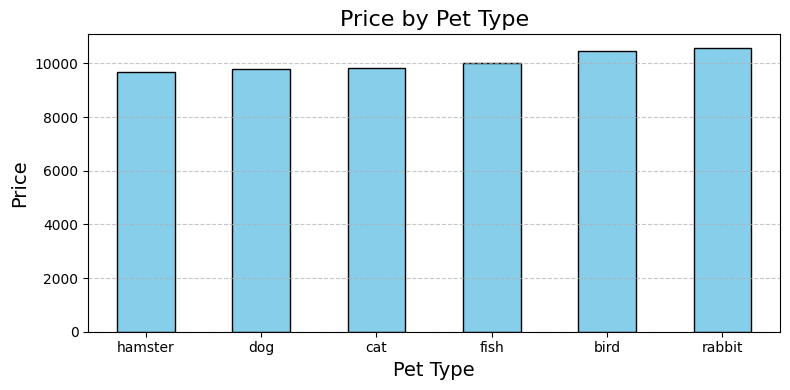

In [47]:
pet_type_price = df.groupby('pet_type')['price'].mean().sort_values()

plt.figure(figsize=(8, 4))
pet_type_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Price by Pet Type', fontsize=16)
plt.xlabel('Pet Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

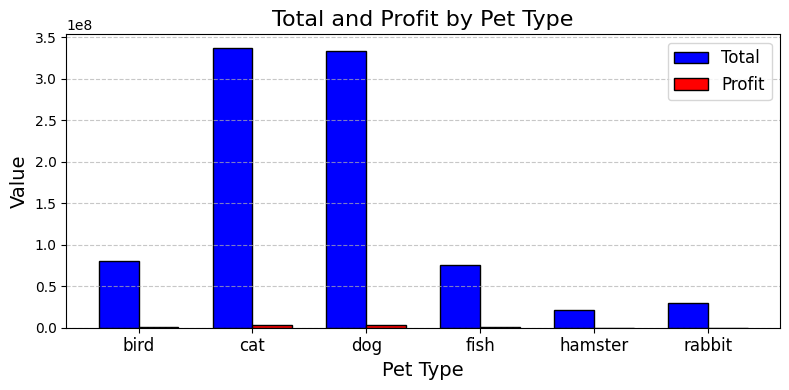

In [48]:
import numpy as np 
pet_type_summary = df.groupby('pet_type').agg({'total': 'sum', 'price': 'sum'})

x = np.arange(len(pet_type_summary.index)) 
width = 0.35  

plt.figure(figsize=(8, 4))
plt.bar(x - width/2, pet_type_summary['total'], width, label='Total ', color='blue', edgecolor='black')
plt.bar(x + width/2, pet_type_summary['price'], width, label='Profit', color='red', edgecolor='black')

plt.title('Total and Profit by Pet Type', fontsize=16)
plt.xlabel('Pet Type', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(x, pet_type_summary.index, rotation=0, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

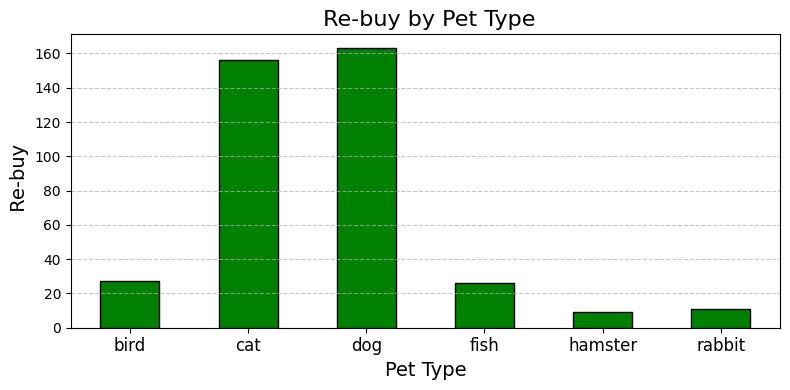

In [49]:
pet_type_rebuy = df.groupby('pet_type')['re_buy'].sum()

plt.figure(figsize=(8, 4))
pet_type_rebuy.plot(kind='bar', color='green', edgecolor='black')
plt.title(' Re-buy by Pet Type', fontsize=16)
plt.xlabel('Pet Type', fontsize=14)
plt.ylabel(' Re-buy', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()